<a href="https://colab.research.google.com/github/SahilKumar777/ML-AI-Projects/blob/main/Logistic%20Regression/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction Classification (Logistic Regression)**
## By :- **Sahil Kumar 777**

**About Project**
* WHO has estimated 12 million deaths occur worldwide, every year due to Heart and cardio vascular diseases.
*The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.
*This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using **logistic regression**

**Goal -** The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).


## Dataset Details

In [79]:
# Load Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [80]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Heart Disease Prediction/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [82]:
# Get Size of dataset

print("Number Of Rows in Dataset = ",df.shape[0])
print("Number Of Features in Dataset = ",df.shape[1])

Number Of Rows in Dataset =  4238
Number Of Features in Dataset =  16


In [83]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


#### Feature Details
* Sex: male or female (binary: “1”, means “Male”, “0” means “Female”)
* Age: Age of the patient (In years)

* Current Smoker: whether or not the patient is a current smoker (binary: “1”, means “Smoker”, “0” means “Non-Smoker”)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

* BP Meds: whether or not the patient was on blood pressure medication
* Prevalent Stroke: whether or not the patient had previously had a stroke

* Prevalent Hyp: whether or not the patient was hypertensive
* Diabetes: whether or not the patient had diabetes
* Tot Chol: total cholesterol level
* Sys BP: systolic blood pressure
* Dia BP: diastolic blood pressure
* BMI: Body Mass Index
* Heart Rate: heart rate
* Glucose: glucose level
Predict variable
* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


In [84]:
numerical_columns = [feature for feature in df.columns if df[feature].dtype=='int64' or df[feature].dtype=='float64']
categorical_columns = [feature for feature in df.columns if df[feature].dtype=='object']

print('Numerical Columns =',numerical_columns)
print('Categorical Columns =',categorical_columns)

Numerical Columns = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
Categorical Columns = []


In [85]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [86]:
# Check the number of unique values in each column
df.nunique()

,0
male,2
age,39
education,4
currentSmoker,2
cigsPerDay,33
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2
totChol,248


## Data Preprocessing

In [87]:
# Check Missing data percentage

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print("Total missing values : ",df.isnull().sum().sum())
missing_data

Total missing values :  645


,Total,%
glucose,388,9.2
education,105,2.5
BPMeds,53,1.3
totChol,50,1.2
cigsPerDay,29,0.7
BMI,19,0.4
heartRate,1,0.0
male,0,0.0
age,0,0.0
currentSmoker,0,0.0


In [88]:
# dropping rows having more than 1 null values
df=df.drop(df[df.T.isnull().sum()>=2].index)

In [89]:
# Handling missing values

# By replacing missing values with mean values
df.fillna({'glucose':df.glucose.mean()},inplace=True)
df.fillna({'totChol':df.totChol.mean()},inplace=True)
df.fillna({'BMI':df.BMI.mean()},inplace=True)
df.fillna({'heartRate':df.heartRate.mean()},inplace=True)

# By droping rows with missing values
df=df.drop(df[df[['education','BPMeds','cigsPerDay']].T.isnull().sum()>0].index)

In [90]:
# Check Duplicate rows
df.duplicated().sum()

0

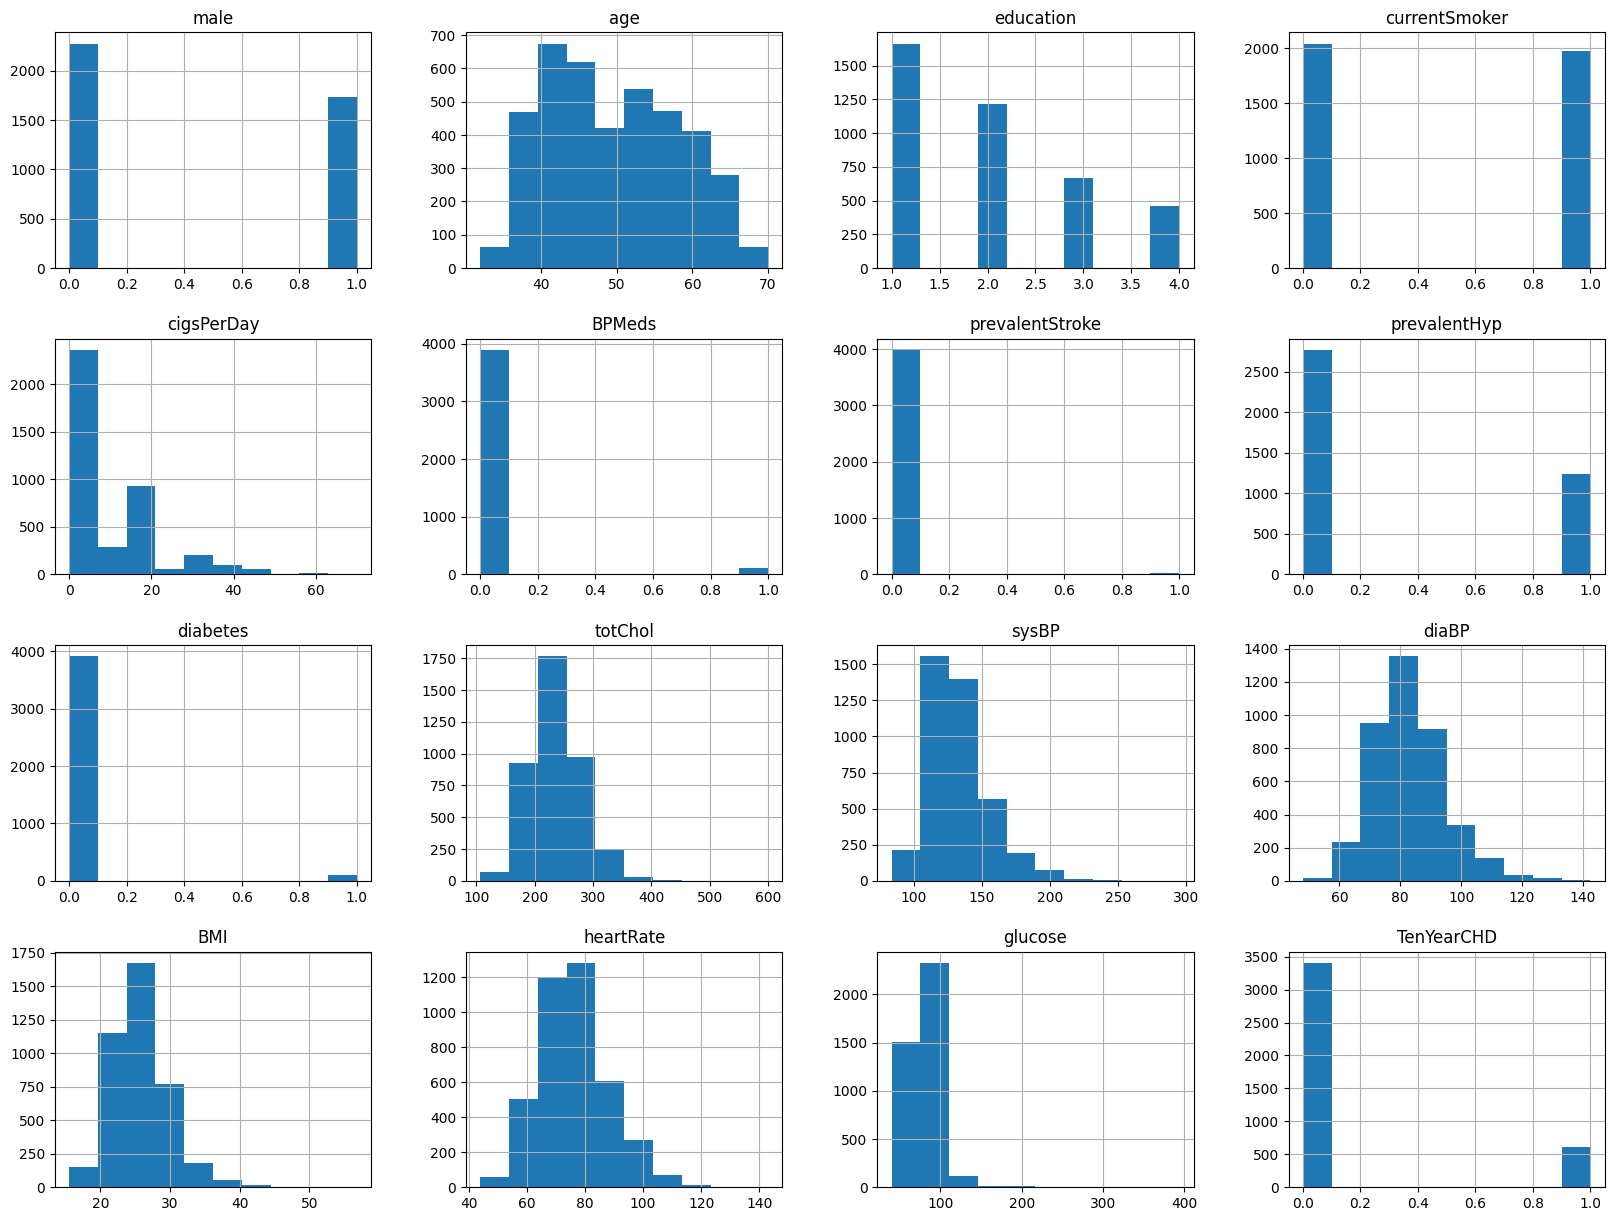

In [91]:
df.hist(figsize=(20,15))
plt.show()

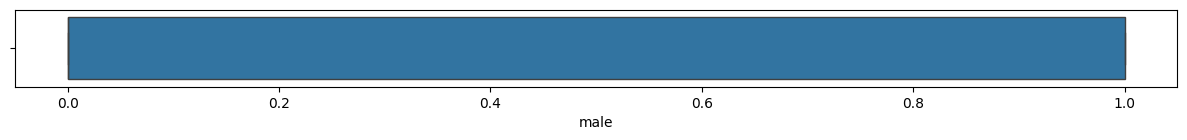

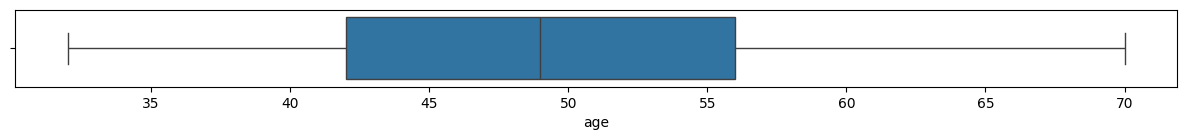

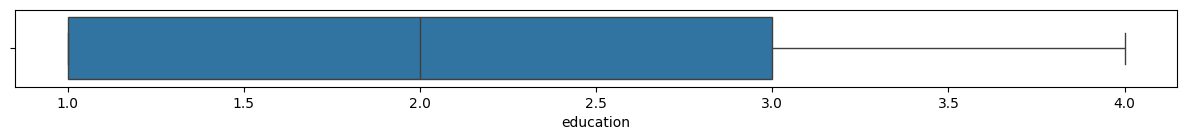

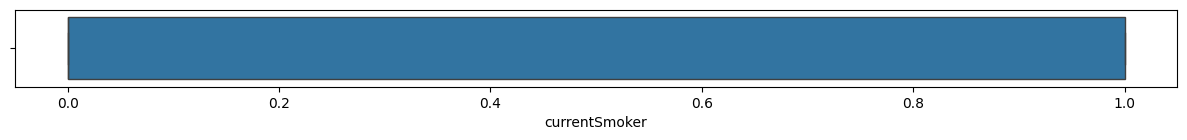

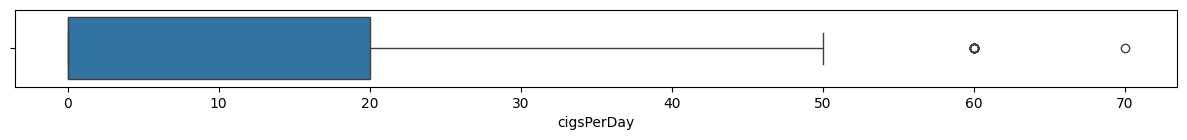

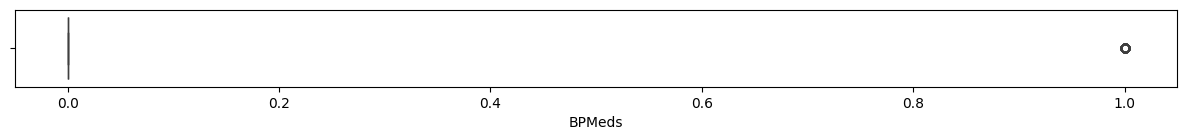

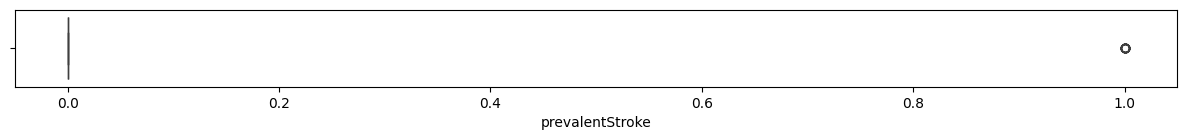

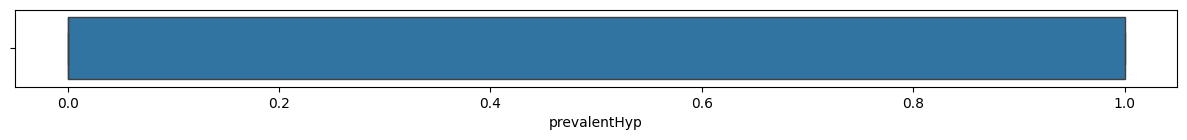

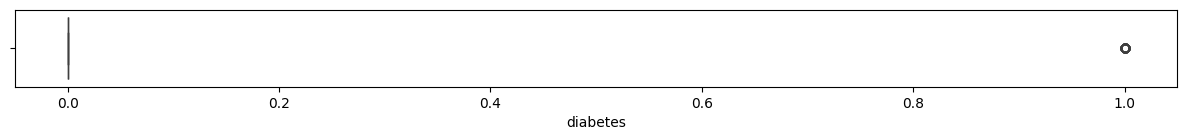

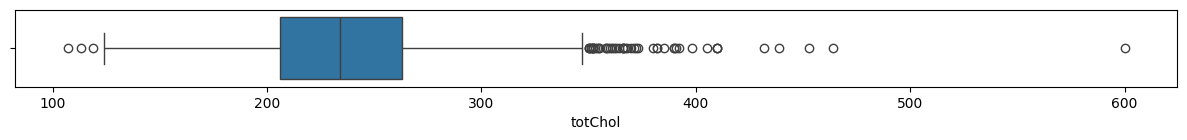

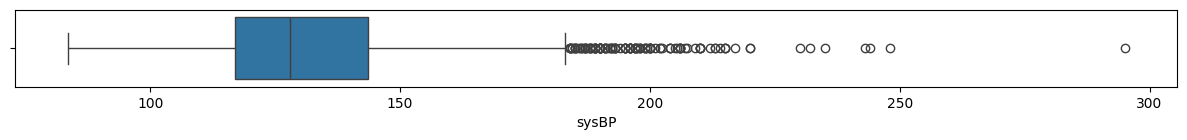

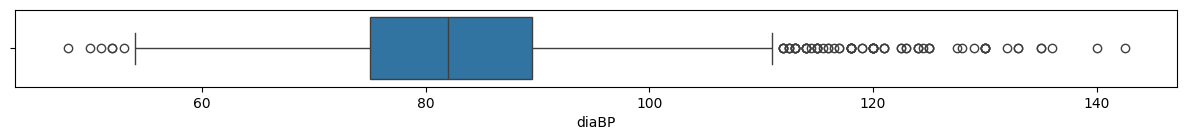

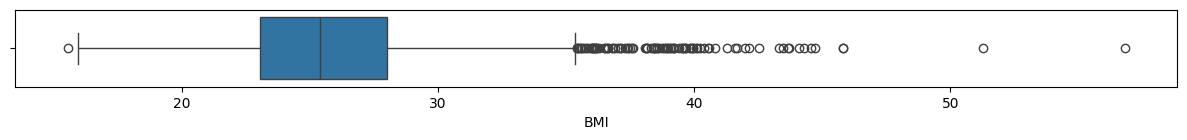

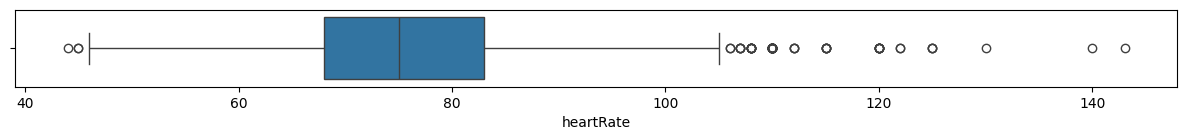

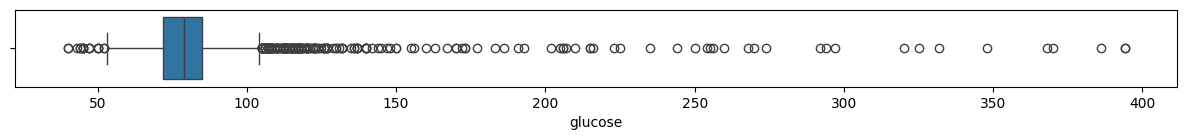

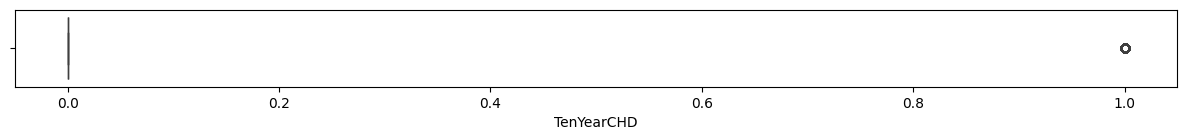

In [92]:
for column in df:
    plt.figure(figsize=(15,1))
    sns.boxplot(data=df, x=column)

In [93]:
# Correlation
corr=df.select_dtypes("number").corr()
corr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.021046,0.012755,0.201454,0.327243,-0.049544,-0.002428,0.008361,0.018924,-0.068040,-0.030830,0.059853,0.079038,-0.115299,0.005347,0.090032
age,-0.021046,1.000000,-0.164134,-0.211241,-0.189338,0.127361,0.055620,0.307007,0.106215,0.266127,0.391695,0.208015,0.134135,-0.009051,0.115831,0.232739
education,0.012755,-0.164134,1.000000,0.018249,0.006561,-0.009852,-0.033423,-0.084339,-0.035816,-0.022344,-0.130782,-0.064625,-0.136165,-0.055672,-0.032433,-0.056424
currentSmoker,0.201454,-0.211241,0.018249,1.000000,0.770470,-0.048755,-0.030943,-0.105058,-0.041455,-0.048463,-0.129850,-0.108062,-0.163644,0.053435,-0.052469,0.021509
cigsPerDay,0.327243,-0.189338,0.006561,0.770470,1.000000,-0.043647,-0.031820,-0.066296,-0.036931,-0.025927,-0.087837,-0.050720,-0.087404,0.068077,-0.052699,0.058153
BPMeds,-0.049544,0.127361,-0.009852,-0.048755,-0.043647,1.000000,0.121020,0.258956,0.047280,0.086148,0.258992,0.195836,0.102821,0.016211,0.051677,0.088556
prevalentStroke,-0.002428,0.055620,-0.033423,-0.030943,-0.031820,0.121020,1.000000,0.073944,0.007999,-0.003573,0.058636,0.053034,0.030037,-0.013682,0.010048,0.057716
prevalentHyp,0.008361,0.307007,-0.084339,-0.105058,-0.066296,0.258956,0.073944,1.000000,0.076863,0.164169,0.694353,0.615781,0.303597,0.149812,0.085307,0.178082
diabetes,0.018924,0.106215,-0.035816,-0.041455,-0.036931,0.047280,0.007999,0.076863,1.000000,0.044490,0.107384,0.053540,0.082219,0.050012,0.612299,0.091382
totChol,-0.068040,0.266127,-0.022344,-0.048463,-0.025927,0.086148,-0.003573,0.164169,0.044490,1.000000,0.212952,0.171104,0.122515,0.087979,0.047621,0.079820


<Axes: >

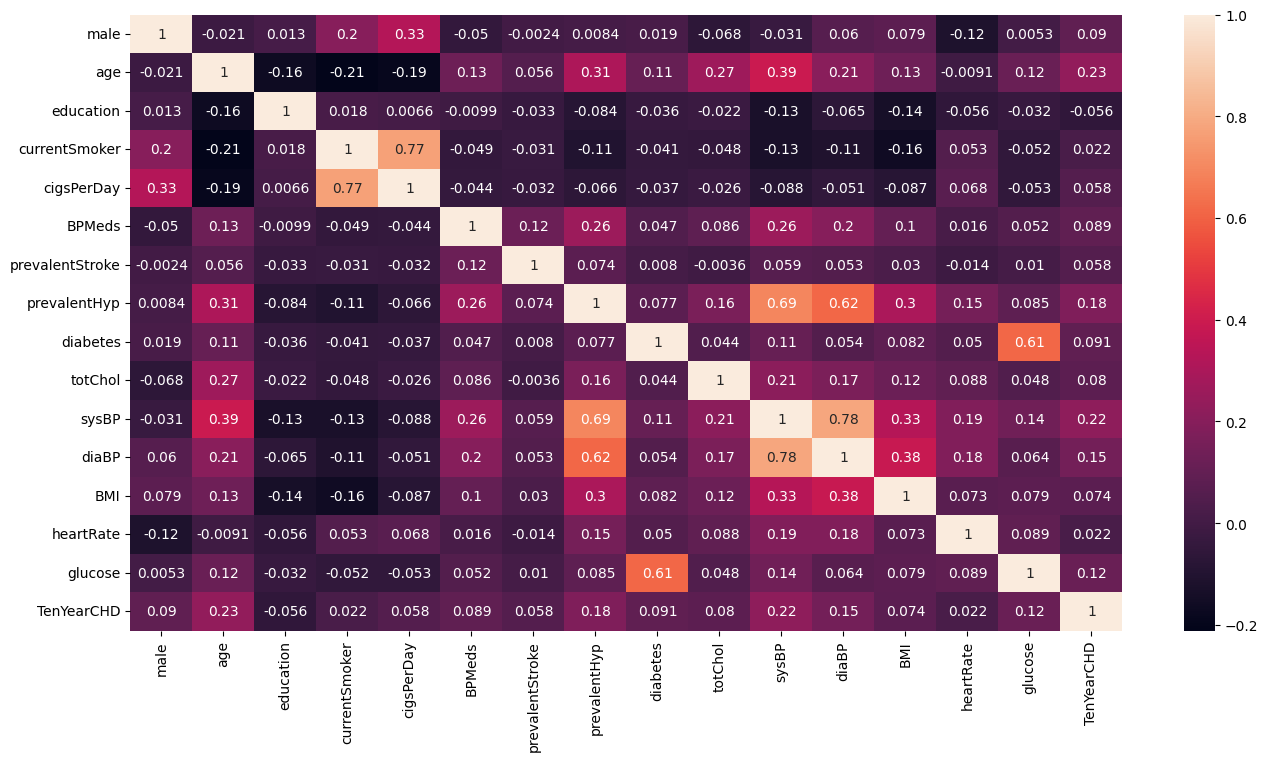

In [94]:
# Correlation visualisation (Heatmap)

plt.figure(figsize=(16,8))
sns.heatmap(df.select_dtypes('number').corr(),annot=True)

## Model Creation and Training

In [95]:
noFeatures = ['TenYearCHD']#,'education','Fasting_Blood_Sugar','Exercise_Induced_Angina']
x=df.drop(columns=noFeatures) # Features
y=df.TenYearCHD               # Label

# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



In [96]:
 # Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [97]:
model =LogisticRegression()
model.fit(x_train,y_train)

# Predictions
y_pred = model.predict(x_test)

In [98]:
pd.Series(y_pred,index=y_test.index).value_counts()

,count
0,1181
1,22


In [99]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.70%


In [100]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1016    7]
 [ 165   15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1023
           1       0.68      0.08      0.15       180

    accuracy                           0.86      1203
   macro avg       0.77      0.54      0.54      1203
weighted avg       0.83      0.86      0.81      1203



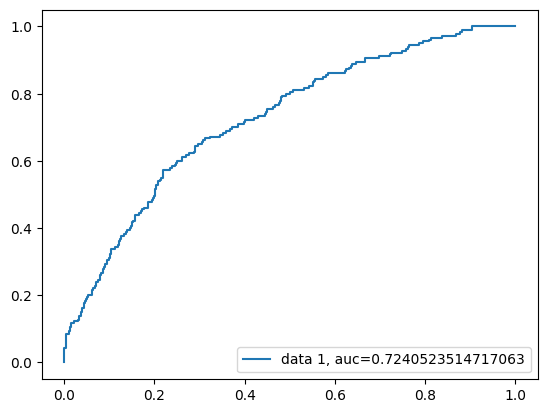

In [101]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()